### Exercise 1

In [22]:
from bidict import bidict
from datetime import datetime
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn import datasets, metrics

google = False
data_path = 'G:/My Drive/csc730'

In [23]:
if google == True:
    from google.colab import drive
    drive.mount('/content/drive')
    !ls "/content/drive/"

In [24]:
# %matplotlib qt

In [25]:
if google==True:
    X_y = np.load(f'{data_path}/skewed_MNIST.npy')
else:
    X_y = np.load(f'{data_path}/skewed_MNIST.npy')
X = X_y[:,:-1]
y = X_y[:,-1]
print(X.shape,y.shape)

(12244, 784) (12244,)


probability=array([0.01559948, 0.00187847, 0.03128063, 0.50073505, 0.25032669,
       0.0077589 , 0.06256125, 0.0008984 , 0.00383861, 0.12512251]) bins=array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) counts=array([ 191,   23,  383, 6131, 3065,   95,  766,   11,   47, 1532],
      dtype=int64)


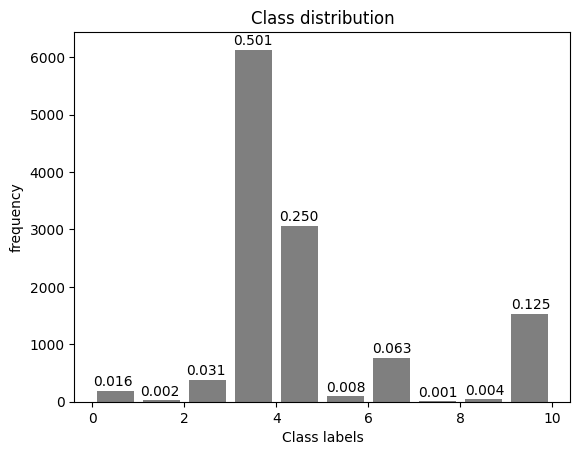

In [26]:
plt.hist(y.astype(int), bins=np.linspace(0,10,11), color='black', alpha=0.5, rwidth=0.8)
plt.xlabel('Class labels')
plt.ylabel('frequency')
plt.title('Class distribution')

probability, bins = np.histogram(y, bins=np.linspace(0,10,11), density=True)
counts, bins = np.histogram(y, bins=np.linspace(0,10,11))

print(f'{probability=} {bins=} {counts=}')

for i in range(len(probability)):
    plt.text(bins[i]+i/100+0.45, counts[i]+30, f'{probability[i]:.3f}', ha='center', va='bottom')

plt.show()


Text(0, 0.5, 'frequency')

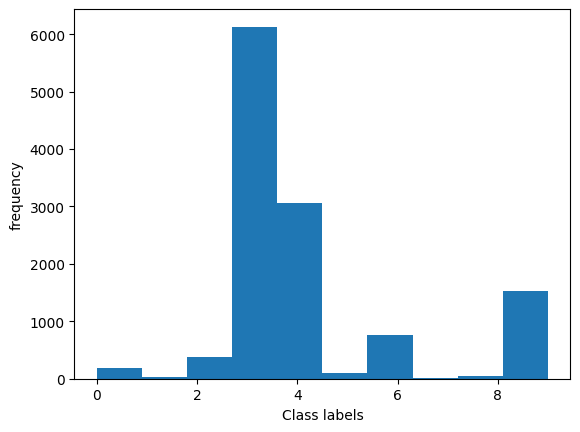

In [27]:
plt.hist(y)
plt.xlabel('Class labels')
plt.ylabel('frequency')

In [28]:
# Using only X, come up with some method to assign an "anomalousness score" to each point (from scratch)
count = np.zeros([X.shape[0],2])

for i in range(X.shape[0]):
    count[i,1] = y[i]
    for j in range(X.shape[1]):
        if(X[i,j] > 128 ):
            count[i,0] += 1
            

In [29]:
print(count)

[[ 88.   7.]
 [127.   7.]
 [ 85.   7.]
 ...
 [ 85.   3.]
 [ 92.   3.]
 [117.   3.]]


In [30]:
mean = np.mean(count[:,0])

(array([ 237., 1852., 3526., 3414., 2000.,  875.,  256.,   64.,   16.,
           4.]),
 array([ 30. ,  53.1,  76.2,  99.3, 122.4, 145.5, 168.6, 191.7, 214.8,
        237.9, 261. ]),
 <BarContainer object of 10 artists>)

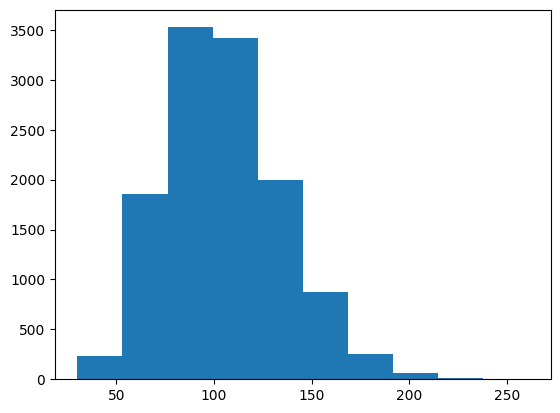

In [31]:
plt.hist(count[:,0])

In [32]:
difference = np.zeros(count.shape)
difference[:,1] = count[:,1]

for i in range(len(count)):
    difference[i,0] = (count[i,0] - mean) ** 2

In [33]:
difference_sorted = difference[np.lexsort((difference[:, 0], -difference[:, 1]))]
print(difference_sorted[-100:, :])
#np.sort(difference, axis=0)

[[  770.25742413     0.        ]
 [  770.25742413     0.        ]
 [  770.25742413     0.        ]
 [  770.25742413     0.        ]
 [  826.76444798     0.        ]
 [  826.76444798     0.        ]
 [  826.76444798     0.        ]
 [  885.27147182     0.        ]
 [  914.85004092     0.        ]
 [  945.77849567     0.        ]
 [ 1008.28551952     0.        ]
 [ 1008.28551952     0.        ]
 [ 1072.79254337     0.        ]
 [ 1072.79254337     0.        ]
 [ 1105.32896937     0.        ]
 [ 1139.29956722     0.        ]
 [ 1139.29956722     0.        ]
 [ 1207.80659107     0.        ]
 [ 1207.80659107     0.        ]
 [ 1278.31361491     0.        ]
 [ 1278.31361491     0.        ]
 [ 1278.31361491     0.        ]
 [ 1278.31361491     0.        ]
 [ 1350.82063876     0.        ]
 [ 1425.32766261     0.        ]
 [ 1425.32766261     0.        ]
 [ 1425.32766261     0.        ]
 [ 1462.79385013     0.        ]
 [ 1501.83468646     0.        ]
 [ 1580.34171031     0.        ]
 [ 1660.84

In [34]:
# Using y, calculate the probabilities of each class
unique, counts = np.unique(y, return_counts=True)
print(unique)
print(counts)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 191   23  383 6131 3065   95  766   11   47 1532]


In [35]:
labels = np.vstack((unique,counts))

In [36]:
print(labels)
print(labels.shape)

[[0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
  7.000e+00 8.000e+00 9.000e+00]
 [1.910e+02 2.300e+01 3.830e+02 6.131e+03 3.065e+03 9.500e+01 7.660e+02
  1.100e+01 4.700e+01 1.532e+03]]
(2, 10)


In [37]:
labels = labels.T

In [38]:
labels = labels[np.lexsort((labels[:, 0], -labels[:, 1]))]
print(labels)

[[3.000e+00 6.131e+03]
 [4.000e+00 3.065e+03]
 [9.000e+00 1.532e+03]
 [6.000e+00 7.660e+02]
 [2.000e+00 3.830e+02]
 [0.000e+00 1.910e+02]
 [5.000e+00 9.500e+01]
 [8.000e+00 4.700e+01]
 [1.000e+00 2.300e+01]
 [7.000e+00 1.100e+01]]


In [39]:
total = np.sum(labels[:,1])

probabilities = np.zeros(shape= (10,1))

probabilities = labels[:, 1] / total

print('Probabilities for Each Class:\n')
for i in range(len(probabilities)):
    print(f'Class {labels[i,0]}: {probabilities[i]:.4f}')

Probabilities for Each Class:

Class 3.0: 0.5007
Class 4.0: 0.2503
Class 9.0: 0.1251
Class 6.0: 0.0626
Class 2.0: 0.0313
Class 0.0: 0.0156
Class 5.0: 0.0078
Class 8.0: 0.0038
Class 1.0: 0.0019
Class 7.0: 0.0009


In [40]:
# Assuming the "correct" answer would be to have the anomalousness ranking match the ordering of the 
# class probability, calculate the accuracy of your method 

true_labels = np.zeros(shape = (int(total), 1))

true_labels[:6131] = 3
true_labels[6131:9196] = 4
true_labels[9196:10728] = 9
true_labels[10728:11494] = 6
true_labels[11494:11877] = 2
true_labels[11877:12068] = 0
true_labels[12068:12163] = 5
true_labels[12163:12210] = 8
true_labels[12210:12233] = 1
true_labels[12233:] = 7

correct_vals = np.zeros(shape = (int(total), 1))    

for i in range(len(correct_vals)):
    if(true_labels[int(total-i-1)] == difference_sorted[i,1]):
        correct_vals[i] = 1
        
correct_guesses = np.sum(correct_vals)

accuracy = correct_guesses / total

print(f'Please be a good accuracy: {accuracy}')


Please be a good accuracy: 0.6548513557660895


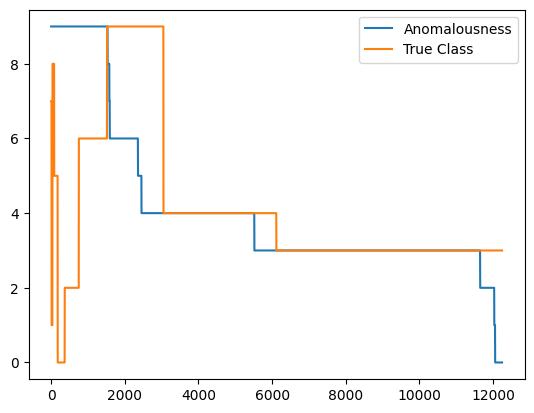

In [50]:
plt.plot(difference_sorted[:,1].astype(int), label='Anomalousness')
plt.plot(true_labels[::-1], label='True Class')
plt.legend()
plt.show()




probability=array([0.01733275, 0.00208719, 0.03475625, 0.55637228, 0.27814077,
       0.008621  , 0.0695125 , 0.00099822, 0.00426513, 0.13902501]) bins=array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]) counts=array([ 191,   23,  383, 6131, 3065,   95,  766,   11,   47, 1532],
      dtype=int64)


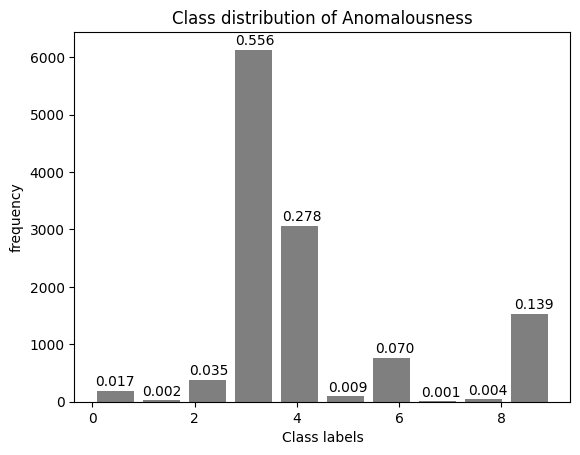

In [52]:
plt.hist(difference_sorted[:,1], bins=10, color='black', alpha=0.5, rwidth=0.8)
plt.xlabel('Class labels')
plt.ylabel('frequency')
plt.title('Class distribution of Anomalousness')

probability, bins = np.histogram(difference_sorted[:,1], bins=10, density=True)
counts, bins = np.histogram(difference_sorted[:,1], bins=10)

print(f'{probability=} {bins=} {counts=}')

for i in range(len(probability)):
    plt.text(bins[i]+i/100+0.45, counts[i]+30, f'{probability[i]:.3f}', ha='center', va='bottom')

plt.show()
